## Дипломная работа по курсу "Python для анализа данных"

In [1]:
#Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

### Загрузить файл HR.csv в pandas dataframe

In [2]:
hr = pd.read_csv('HR.csv')

In [3]:
type(hr)

pandas.core.frame.DataFrame

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Рассчитать основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
# Основные характеристики, кроме моды:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# На примере столбца average_monthly_hours самостоятельно воспроизведем расчеты основных базовых характеристик
print('Количество -', hr['average_montly_hours'].count())
print('Среднее арифметическое -', hr['average_montly_hours'].mean())
print('Стандартное отклонение -', hr['average_montly_hours'].std())
print('Минимум -', hr['average_montly_hours'].min())
print('Медиана -', hr['average_montly_hours'].median())
print('Мода -', hr['average_montly_hours'].round().mode()[0])
print('Максимум -', hr['average_montly_hours'].max())


Количество - 14999
Среднее арифметическое - 201.0503366891126
Стандартное отклонение - 49.943099371284305
Минимум - 96
Медиана - 200.0
Мода - 135
Максимум - 310


### Рассчитать и визуализировать корреляционную матрицу для количественных переменных.
### Определить две самые скоррелированные и две наименее скоррелированные переменные.

In [7]:
#Корреляция Пирсона
correl = hr.corr()

In [8]:
correl

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


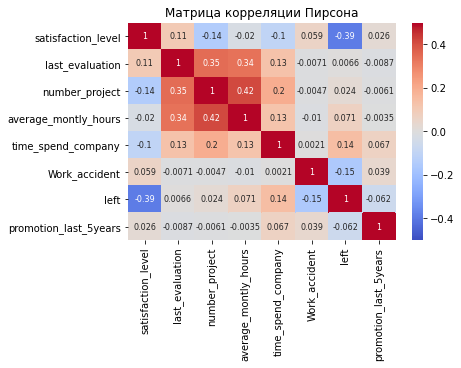

In [9]:
#Визуализируем для упрощения нахождения сильно скоррелированных переменных
ax = plt.axes()
sns.heatmap(correl, vmin=-0.5, vmax=0.5, cmap="coolwarm", annot=True, annot_kws={"size": 8}, ax=ax)
ax.set_title('Матрица корреляции Пирсона', fontsize=12)
plt.show()


 - Наиболее скоррелированы - number_project и average_montly_hours(прямая - 0.42), left и satisfaction_level(обратная - -0.39)
 - Наименее скоррелированы - time_spend_company и Work_accident(прямая - 0.0021), average_montly_hours и promotion_last_5years(обратная - -0.0035)

### Рассчитать сколько сотрудников работает в каждом департаменте.

In [10]:
hr['department'].value_counts().reset_index().rename(columns={'index':'department',
                                                            'department':'count_of_workers'})

,department,count_of_workers
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


### Показать распределение сотрудников по зарплатам.

In [11]:
#Процент сотрудников по категориям зарплат. Если убрать normalize=True, то будет количество.
hr['salary'].value_counts(normalize=True).to_frame()

,salary
low,0.487766
medium,0.429762
high,0.082472


### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [12]:
sal = pd.DataFrame(hr.groupby(['department','salary'])['salary'].count()).rename(columns={'salary':'count_of_workers'})

In [13]:
display(sal)

count_of_workers
department  salary                  
IT          high                  83
            low                  609
            medium               535
RandD       high                  51
            low                  364
            medium               372
accounting  high                  74
            low                  358
            medium               335
hr          high                  45
            low                  335
            medium               359
management  high                 225
            low                  180
            medium               225
marketing   high                  80
            low                  402
            medium               376
product_mng high                  68
            low                  451
            medium               383
sales       high                 269
            low                 2099
            medium              1772
support     high                 141
            low                 1146
            medium               942
technical   high                 201
            low                 1372
            medium              1147

In [14]:
#При желании отразить в процентах:
#sal_per = sal.groupby(level=0).apply(lambda x:
#                                                 100 * x / float(x.sum()))
#display(sal_per)

### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [15]:
hr.groupby('salary').mean()[['average_montly_hours']]

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


Гипотеза опровергнута. Сотрудники с высокой зарплатой в среднем проводят столько же времени на работе, как и сотрудники с низким окладом.

### Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)
 - Доля сотрудников с повышением за последние 5 лет
 - Средняя степень удовлетворенности
 - Среднее количество проектов

In [16]:
def prom(l = 0):
    '''Функция prom выводит долю сотрудников с повышением за последние 5 лет
    и принимает на вход значение l, содержащее признак увольнения(0(по умолчанию) или 1)'''
    display(hr[ hr.left == l ]['promotion_last_5years'].value_counts(normalize=True).to_frame())

In [17]:
def satis(l = 0):
    '''Функция satis показывает среднюю степень удовлетворенности
    и принимает на вход значение l, содержащее признак увольнения(0(по умолчанию) или 1)'''
    print(hr[ hr.left == l ]['satisfaction_level'].mean())

In [18]:
def proj(l = 0):
    '''Функция proj показывает среднее количество проектов
    и принимает на вход значение l, содержащее признак увольнения(0(по умолчанию) или 1)'''
    print(hr[ hr.left == l ]['number_project'].mean())

In [19]:
prom(0)
prom(1)

,promotion_last_5years
0,0.973749
1,0.026251


,promotion_last_5years
0,0.994679
1,0.005321


In [20]:
satis(0)
satis(1)

0.666809590479516
0.44009801176140917


In [21]:
proj(0)
proj(1)

3.786664333216661
3.8555026603192384


### Разделить данные на тестовую и обучающую выборки. 

In [22]:
data = hr[['satisfaction_level', 'last_evaluation', 'number_project',
           'average_montly_hours', 'time_spend_company', 'Work_accident', 
           'promotion_last_5years']].copy()

data_target = pd.DataFrame(hr.left)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, data_target, test_size=0.30, random_state=42)

#Количество наблюдений на тесте и обучении для целевой и переменных
print(len(X_test), len(X_train), len(y_test), len(y_train))


4500 10499 4500 10499


### Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). 

In [24]:
lda = LinearDiscriminantAnalysis()

In [25]:
lda.fit(X_train,y_train.values.ravel())

#Коэф. переменных для каждого класса
lda.coef_

array([[-4.57738626e+00,  6.13822647e-01, -2.10613368e-01,
         4.55442333e-03,  2.21314862e-01, -1.05033789e+00,
        -1.08559074e+00]])

### Оценить качество модели на тестовой выборки

In [26]:
accuracy_score(y_test.values.ravel(), lda.predict(X_test))

0.7557777777777778

Качество довольно хорошее.

### Загрузить jupyter notebook с решение на github и прислать ссылку

Сделано :) 